# Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

### This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

### Explore and analyze the data to discover important factors that govern the bookings




# First things first! For any manipulation related to data starts with understanding the data. It is a step wise and sequencial process, which seems to have shortcut but actually... we realize shortcuts here are long cuts! In order to approach the given problem it have prepared the schema which we will be following during the analysis which is as below:

#### 1. Getting the data
####  2. Understading the schema of the data
#### 3. Cleaning and pre pocessing of the data
#### 4. Understading the columns
#### 5. EDA and visulaization
    

# 1. Getting the data

In [1]:
#importing the libraries to help us
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#defining the path of the file
path = r"C:\\Users\\ASUS VivoBooK\\Desktop\\alma\\capstone\\hotel.csv"

In [3]:
#reading the csv file
raw_df = pd.read_csv(path)

# 2. Understading the schema

First thing first, let's see the total rows and columns of the dataset


In [4]:
# to know the shape of the dataset we have
raw_df.shape

(65535, 32)

In [5]:
# table schema
raw_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


So, as we can see we have 32 columns and 65535 rows in our dataset. Now let's deep dive more into the column information.

In [6]:
# to know the column heading of the dataset
raw_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# let's check all the names and datatype of all the columns present in the dataset in order to understand the dataset in better way.

# Getting the list of columns
col = raw_df.columns
  
# Printing Number of columns

print('Total number of columns in the dataset are :', len(col))
      
# understading the column property
raw_df.dtypes

Total number of columns in the dataset are : 32


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## 3. Cleaning and pre-processing of the dataset

#####  First, let's handle the missing values after checking for the duplicates. So, firstly we will look after  the columns with the missing values. Then we will look for null value in the dataset and clean the dataset handling missing values and the null values

##### Missing Values

In [8]:
# getting summary of missing values present in the dataset.

for column in raw_df:
    if raw_df[column].isnull().any():
       #print('{0} has {1} null values {2} '.format(column, df[column].isnull().sum(), df[column].isnull().sum() * 100 /df.shape[0]))
        print('{0} has {1} missing values, which are {2} % of total column '.format(column, raw_df[column].isnull().sum(), round(raw_df[column].isnull().sum() * 100 /raw_df.shape[0], 5)))


children has 4 missing values, which are 0.0061 % of total column 
country has 482 missing values, which are 0.73548 % of total column 
agent has 9991 missing values, which are 15.24529 % of total column 
company has 61836 missing values, which are 94.35569 % of total column 


#### Checking for duplicates

In [9]:
# creating copy of dataset

working_df = raw_df.copy()

working_df[working_df.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows

(17617, 32)

In [10]:
# Droping duplicate values
working_df.drop_duplicates(inplace = True)

In [11]:
working_df.shape

(47918, 32)

In [12]:
#lets group some of the columns which can be useful in analysis as grouped element

working_df['kids'] = working_df['children'] + working_df['babies']

working_df['Total_Guests'] = working_df['adults'] + working_df['kids']

working_df['total_stay'] = working_df['stays_in_weekend_nights']+working_df['stays_in_week_nights']

In [13]:
# 488 rows has missing values in the country columns. Since, country column plays crucial role in the analysis, in order to increase the reliabilty we will frop those entire rows having missing rows

df = working_df.dropna(axis = 0, subset = ['country', 'kids'])
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7082
company                           44864


In [14]:
df= working_df.copy()

#dropping the column which are not required for the analysis 

df=working_df.drop(['company', 'babies'],axis=1)

Now, our dataset is clean and ready-to-use for analysis and visualization. But, before moving towards analysis part , let us first try to estimate the reliablity of the dataset using Statistical techniques. As of now, we are limiting this till the outlier detection. Based on outliers, we will try to assume reliabilty of the data. This can also be done by observing the column features, if the data is normally distributed by plotting a histogram, the data will be more reliable.

In [15]:
# statistical summary of the numerical columns of the dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,...,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids,Total_Guests,total_stay
count,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000,47914.000000,47918.000000,...,47918.000000,47918.000000,40510.000000,47918.000000,47918.000000,47918.000000,47918.000000,47914.000000,47914.000000,47918.000000
mean,0.380045,82.644789,2016.074857,27.283192,15.797508,1.134626,2.985663,1.880442,0.148725,0.035623,...,0.122063,0.282524,152.640138,1.013753,100.398041,0.117263,0.629221,0.162019,2.042430,4.120289
std,0.485403,88.552418,0.695831,14.130169,8.868213,1.127257,2.359844,0.681368,0.476049,0.185351,...,0.917571,0.754714,118.566828,12.257287,62.121061,0.327140,0.809214,0.493466,0.858352,3.229901
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,60.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,51.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,240.000000,0.000000,88.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,130.000000,2017.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,240.000000,0.000000,129.000000,0.000000,1.000000,0.000000,2.000000,6.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,...,30.000000,20.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,10.000000,55.000000,69.000000


### Plotting a box plot to understand the outliers

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

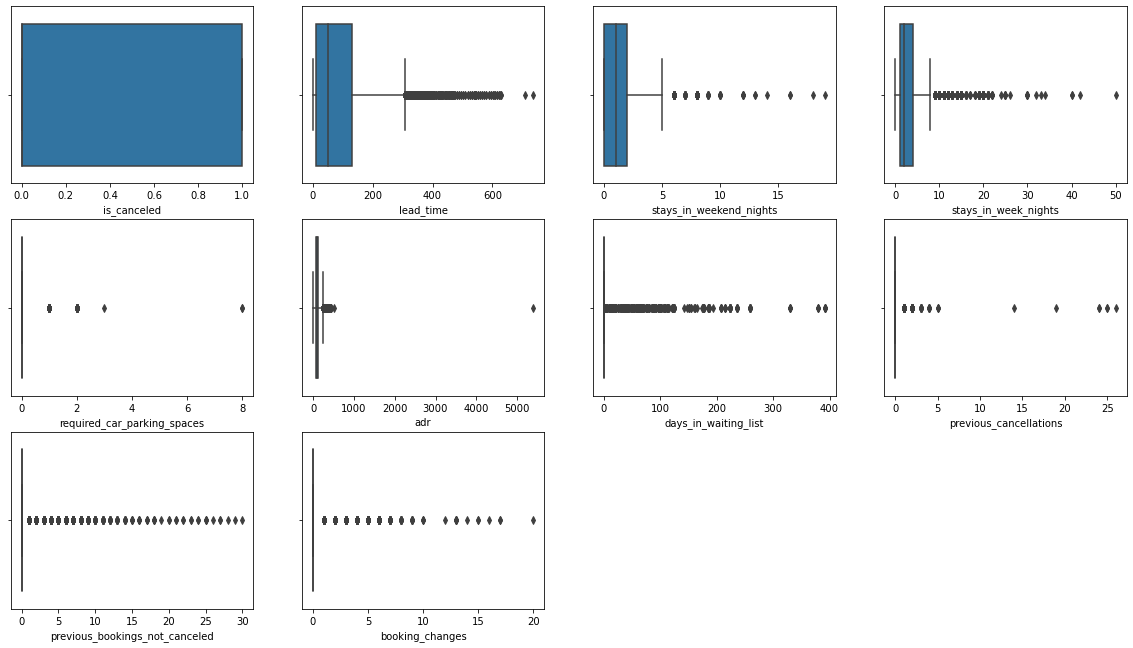

In [16]:
# defining a variable containing all the numerical columns
columns = ['is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'required_car_parking_spaces', 'adr','days_in_waiting_list', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1

# plotting box plot using matplotlib

plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])

As we can see, this dataset has many outliers and thus we can infer that this dataset is not very reliable.

In [17]:
num_df = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]


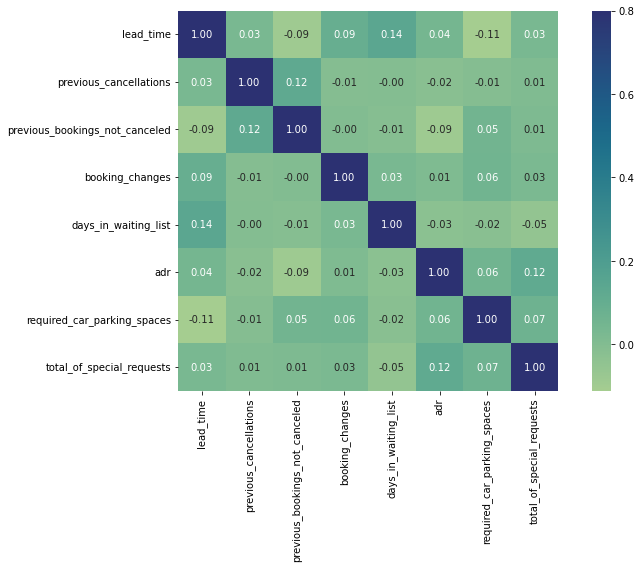

In [18]:
#correlation matrix
corrmat = num_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True, cmap ='crest');

## Some of the insights from the dataset

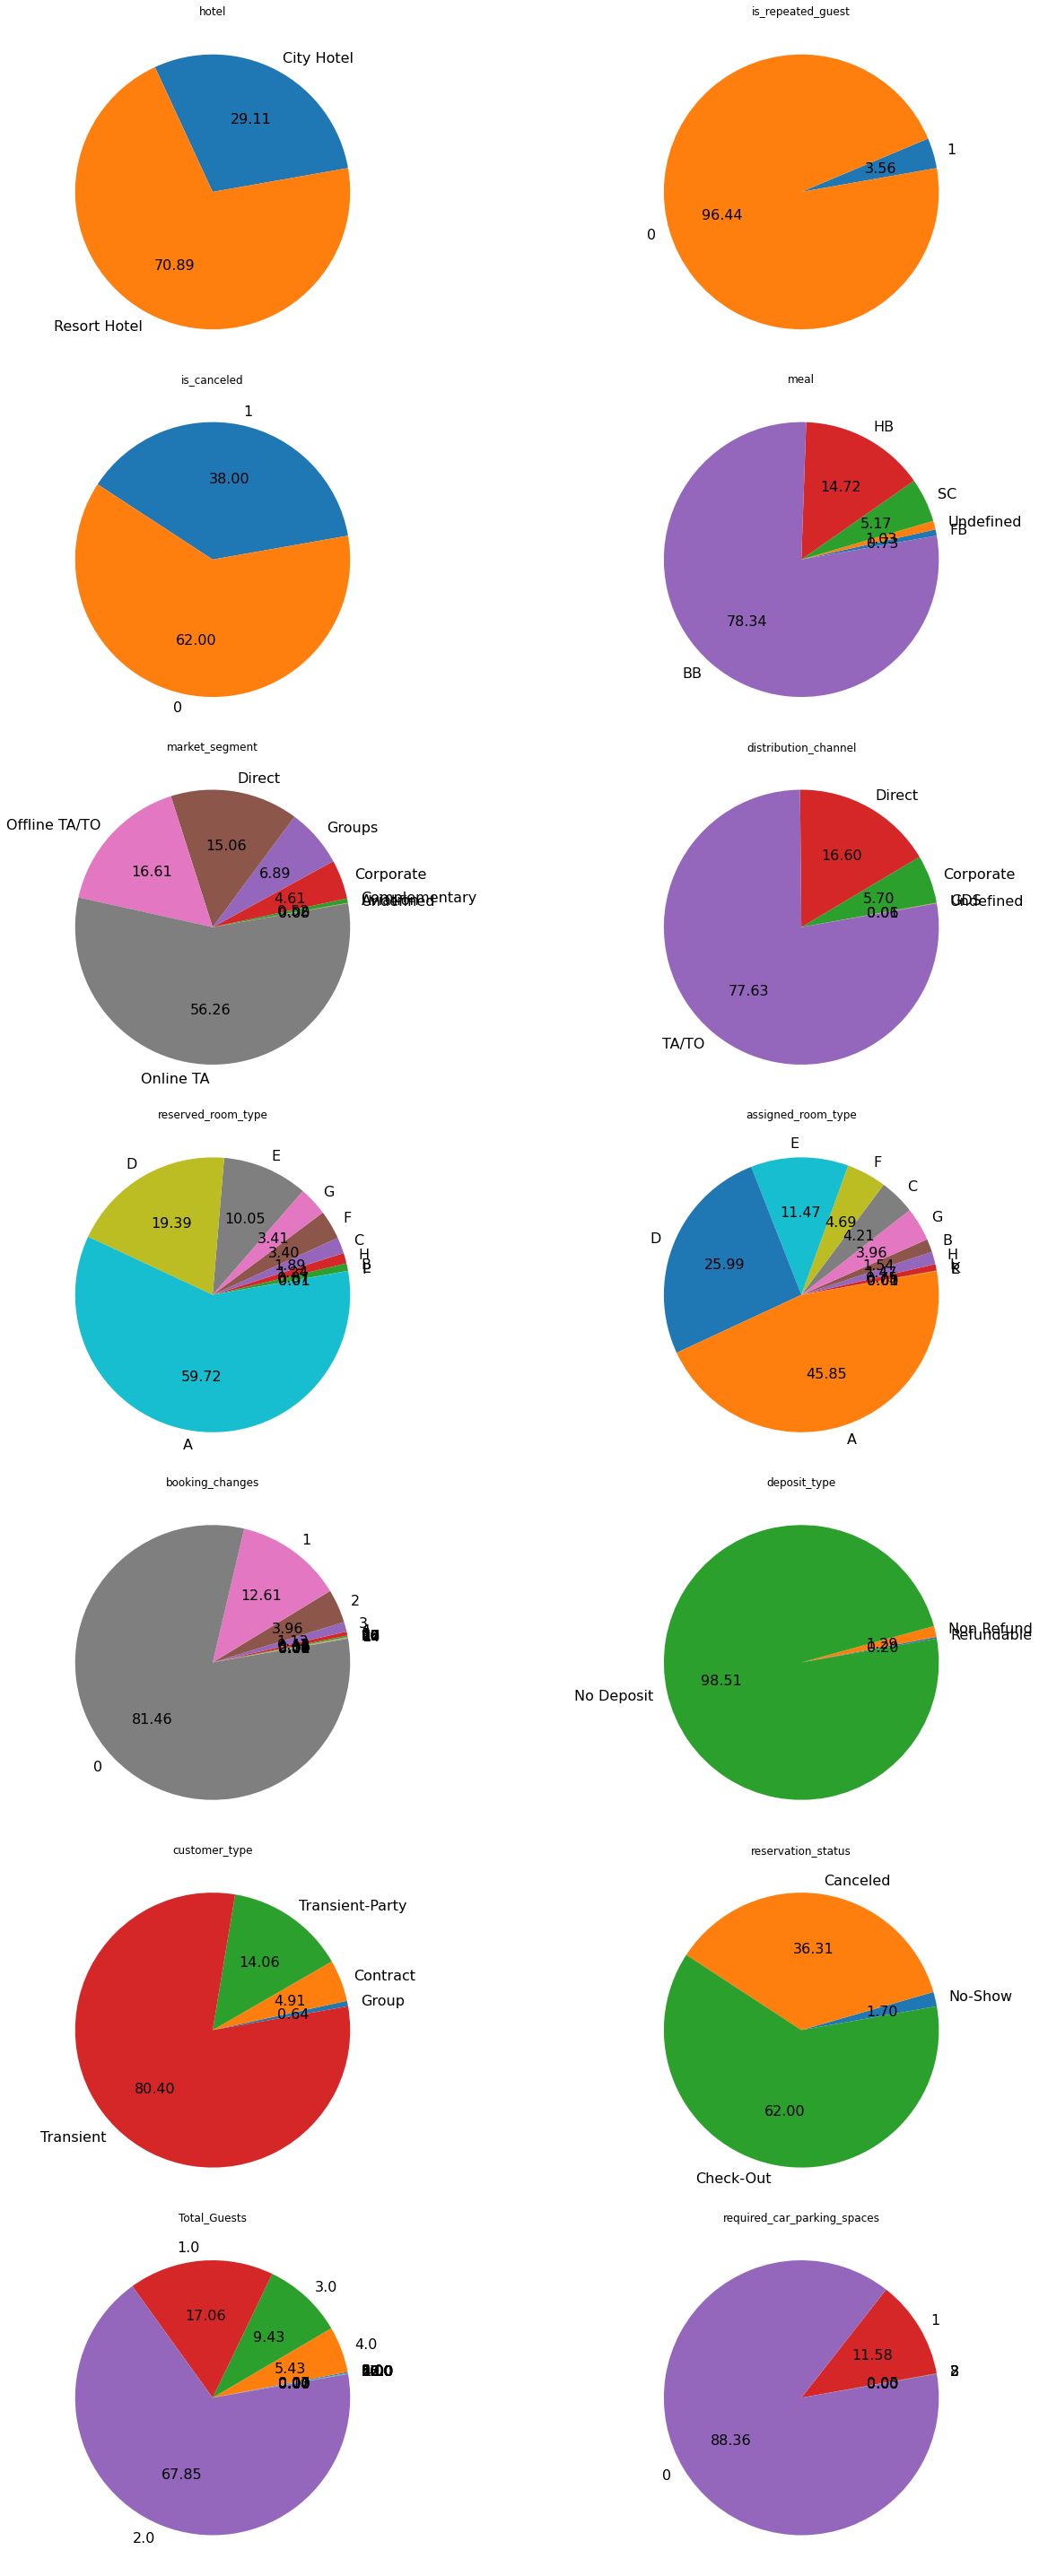

In [19]:
# defining the columns we want to analyse
columns = ['hotel', 'is_repeated_guest', 'is_canceled', 'meal', 'market_segment', 'distribution_channel','reserved_room_type', 'assigned_room_type','booking_changes', 'deposit_type', 'customer_type', 'reservation_status', 'Total_Guests', 'required_car_parking_spaces']


# creating plot of the data. Subplot is used when we want to build multiple charts side by side.
# (6,2) is the rows and columns grid of the chart we want to specify. If we keep it as (6,3) i.e. 6 rows and 3 columns will display chart.
#figsize is to adjust the size of the plot
fig, axes = plt.subplots(7, 2, figsize=(20, 40))

# defining a variable and using a loop to pull each index column of the list defined and plot its chart
axes = [ax for axes_row in axes for ax in axes_row]


for i, c in enumerate(df[columns]):
         df[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.2f', fontsize=16,startangle=10)
         axes[i].set_ylabel(' ')
    
plt.tight_layout()

As we have analysed mutiple covariates, the summary is as follows:
    
    a. Most preferred hotel type is 'Resort hotel' which is preferred by 61.13% of total visitors
    
    b. 97.29% guest were repeated guest. This indicates that hotel holds good image amongst customers. Now, we can furhter explore based on hotel type.
    
    c. 47.08% customers have cancelled their booking. Now, further exploration needs to be done to understand the possible reason of cancellation.
    
    d. 76.92% hotel provide breakfast, which may help hotel in getting good rating from customer. This could be a potiential co-variate for booking status.
    
    e. Market was widely captured by distribution channel like: TA or TA/TO especially by "Online TA" with 44.81% market capture.
    
    f. We can observe a similar trend in the assigned room type and the reserved room type.This is indicative that there has been less modification in the booking. Around 56% customers were assigned A room type and 68% has reserved it. This also indicates the fact that room type A is on higher demand.
    
    g. As expected from the above insight, nearly 85% customers has not made any changes to their booking.
    
    h.Nearly 75% of the customers are Transient customer type, with very few customers had booked as group.
    
    i. Most of the hotel does not have any security deposit for booking (86.47%), this could increase the number of booking of those speicific hotels.
    
    j. Most of the customers who have booked hotel are 2 in number that is majorly adults have booked the hotel.
    
    k. majority of the hotels (around 91%) had not provided the car parking spaces. Providing additional facilities to customer may increase the booking,
    
    
    
    

#### which room type has highest adr?

Text(0.5, 1.0, 'ADR according to room type')

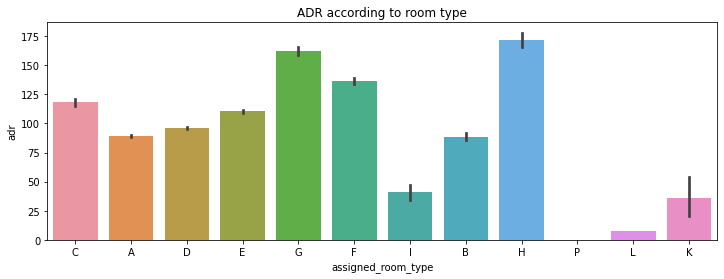

In [20]:
plt.figure(figsize=(12,4))

grp_by_room = df.groupby('assigned_room_type')
df['Num_of_bookings'] = grp_by_room.size()
ax = sns.barplot(x = df['assigned_room_type'], y = df['adr'])
ax.set_title("ADR according to room type")



Although room type A was on demand and most booked room. Highest revenue was produced by room type H followed by G.


## Most revenue is produced by which hotel?

No handles with labels found to put in legend.


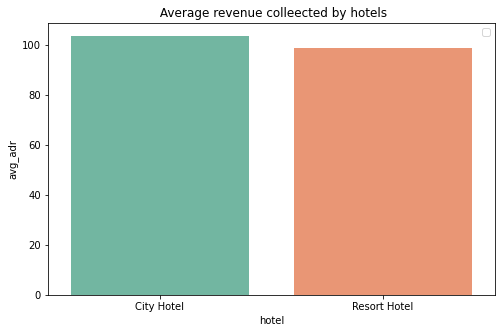

In [21]:
grouped_by_hotel = df.groupby('hotel')
# calculating average adr
hotel_revenue = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   
plt.figure(figsize = (8,5))
ax = sns.barplot(x = hotel_revenue['hotel'], y = hotel_revenue['avg_adr'], palette ="Set2" )
plt.legend()
ax.set_title(" Average revenue colleected by hotels")
plt.show()

Although resorts are the preferred hotel by guest but city hotel produced more revenue comparitevly.

## Which country has made the highest booking?

In [22]:
country_hotel_booked = df[df['country']=='PRT']['hotel'].value_counts()
top_10_countries = df[df['is_canceled']==0]['country'].value_counts()[:10]
top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100

top_10_countries

,country,number_of_bookings,percentage
0,PRT,10483,41.077586
1,GBR,5403,21.171630
2,ESP,3091,12.112069
3,FRA,1727,6.767241
4,IRL,1656,6.489028
5,DEU,1084,4.247649
6,CN,546,2.139498
7,ITA,540,2.115987
8,NLD,523,2.049373
9,BEL,467,1.829937


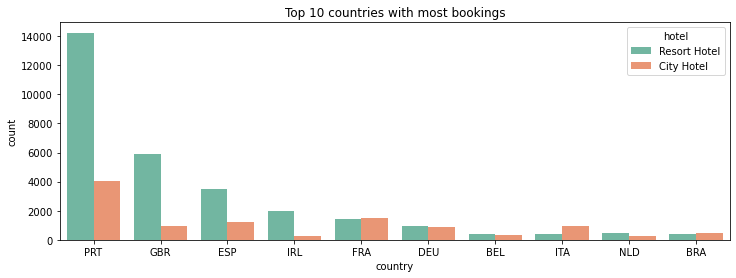

In [23]:
# top countries who books hotel

#filtering top 10 countries who has done most bookings. 
df['country'].value_counts().head(10)

# saving the data in the dataframe
top_countries = df[df['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL","BEL","BRA","NLD"])]

# ploting a countplot
plt.figure(figsize=(12,4))
sns.countplot(x='country', hue = 'hotel', data= top_countries, palette ="Set2")
plt.title('Top 10 countries with most bookings')
plt.show()

As we can infer from the plot, Portugal does most hotel booking. This plot represent the top 10 countries with most bookings done

##  Which countries has cancelled the booking most?


In [24]:
country_hotel_cancelled = df[df['is_canceled'] == 1]['country'].value_counts()[:10]
country_hotel_cancelled

PRT    7823
ESP    1593
GBR    1466
FRA    1181
ITA     806
DEU     698
IRL     534
BRA     515
CHN     298
CHE     282
Name: country, dtype: int64

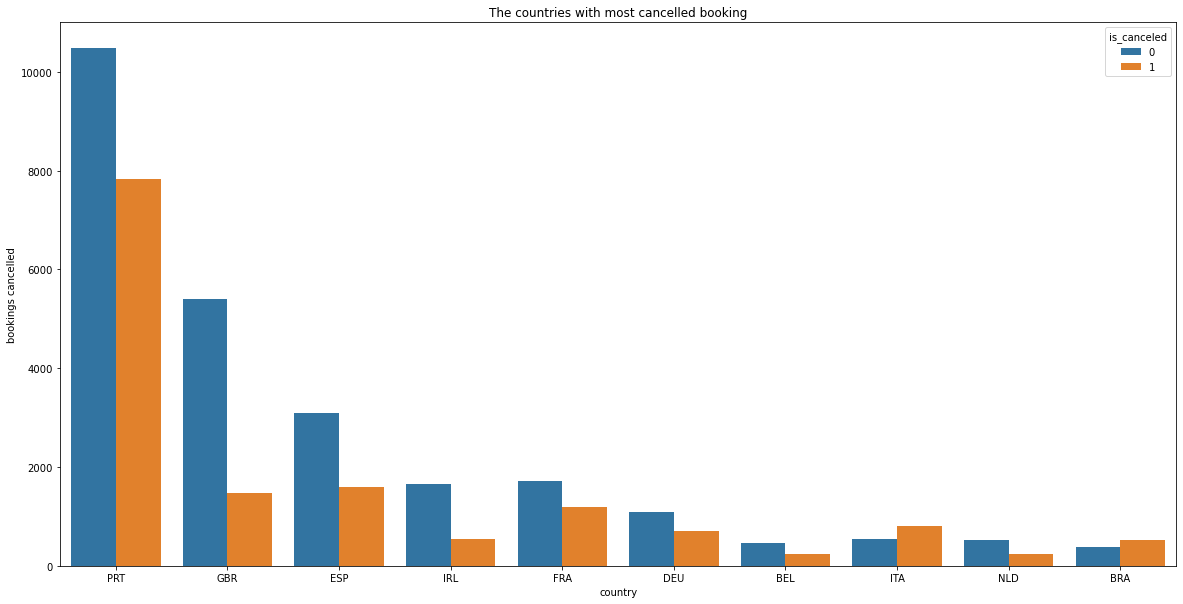

In [25]:
# Countries cancelled most of the booking

# ploting a countplot
plt.figure(figsize = (20,10))
ax = sns.countplot(x='country', hue = 'is_canceled', data= top_countries)
plt.title('The countries with most cancelled booking')
ax.set_ylabel('bookings cancelled')
plt.show()

Although Portugal has done the highest booking but its cancellation rate is also very high as compared to other countries. 1 represents that the booking has been cancelled


## What were the most active business week/month?

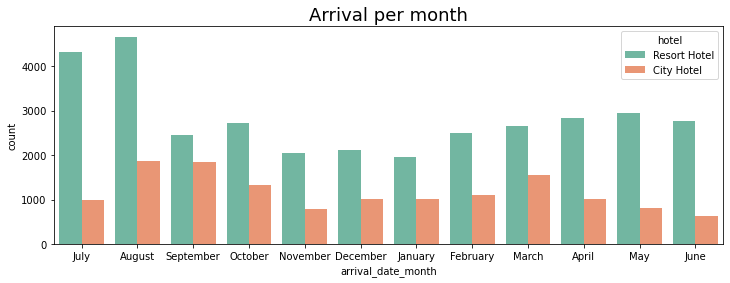

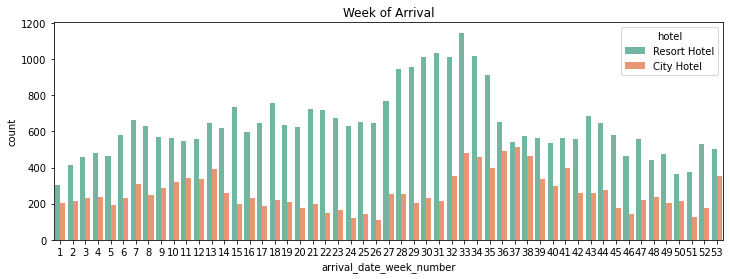

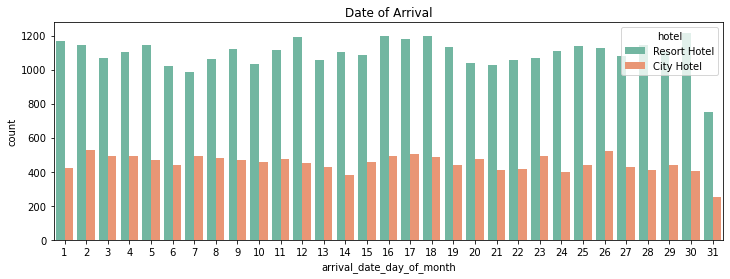

In [26]:
df['arrival_date_month'].value_counts()

#using seasborn library
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= df, palette ="Set2").set_title('Arrival per month',fontsize=18)
plt.show()

#using seasborn library
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_week_number', hue = 'hotel', data= df, palette ="Set2")
plt.title('Week of Arrival')
plt.show()

df['arrival_date_day_of_month'].value_counts()

#using seasborn library
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_day_of_month', hue = 'hotel', data= df, palette ="Set2")
plt.title('Date of Arrival')
plt.show()

As the plot depicts, August and July were the most booked months for the resort hotel, while, for city hotels September and October were most busiest days in terms of booking. A similar trend is being observed when we have plotted the booking with respect to weeks.
In terms of dates, both the hotels shows similar pattern of booking. It is be inferred that comparitevely, resort were booked more on last days of the week while city hotels showed a similar pattern of booking, which could be  futher explored.

## In which month most booking were cancelled?

In [27]:
df[df['is_canceled'] == 1]['arrival_date_month'].value_counts()

August       2583
July         2090
March        1802
September    1509
April        1482
October      1443
June         1428
February     1384
May          1326
December     1213
January      1002
November      949
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, ' Booking cancellation months')

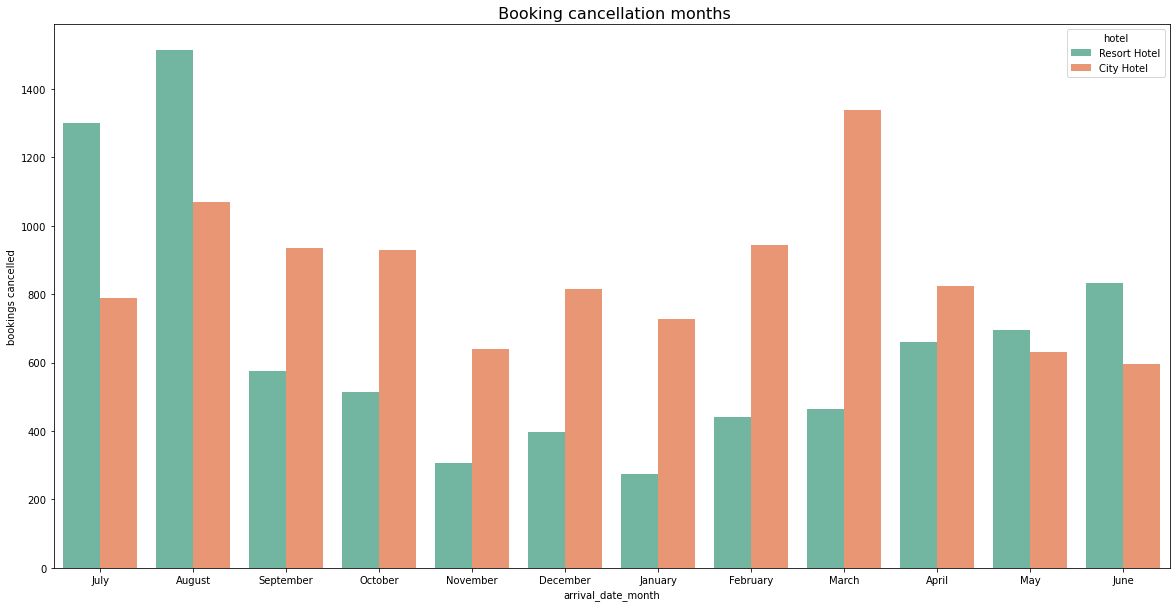

In [29]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'arrival_date_month',hue = 'hotel', data = df[df['is_canceled'] == 1], palette ="Set2")
ax.set_ylabel('bookings cancelled')
ax.set_title(' Booking cancellation months', fontsize = 16)

Most of the bookings were cancelled in the month of October for City hotels, while Resort hotels were cancelled in the month of August. Moreover, similar cancellation  of the booking were seen in August month for both the hotel type. Cumulatively, city hotels has more booking cancellations.


##  Stay in hotel

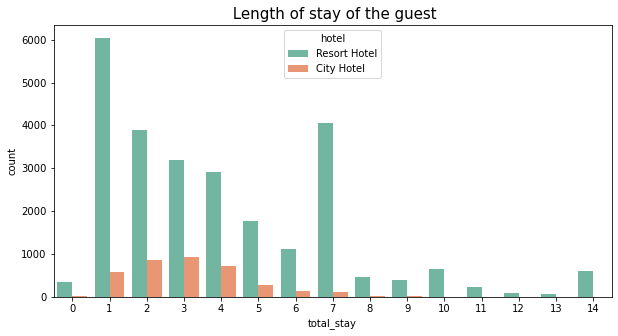

In [30]:
not_canceled = df[df['is_canceled'] == 0]
stay_hotel = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
ax = sns.countplot(x = stay_hotel['total_stay'], hue = stay_hotel['hotel'] , palette ="Set2")
ax.set_title(" Length of stay of the guest", fontsize =15)
plt.show()

In Resorts, most of the guest stayed for 1 day, while for city hotel most of the guest stayed in range of 1-7 days.

## Average daily price trend of the hotels

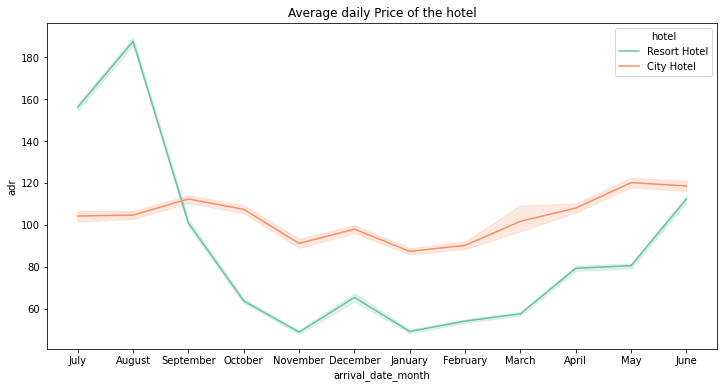

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df, palette ="Set2")
plt.title("Average daily Price of the hotel")
plt.show()

As natural, intitially the price of resort hotel increased till August which dropped to lowest in November month and then further increased.
City hotel prices were consistant compared to resort hotel which increased to highest in September. Further exploration about the effect of price on booking status and many other covariates could be performed and analysed.

## Effect of ADR on length of total stay

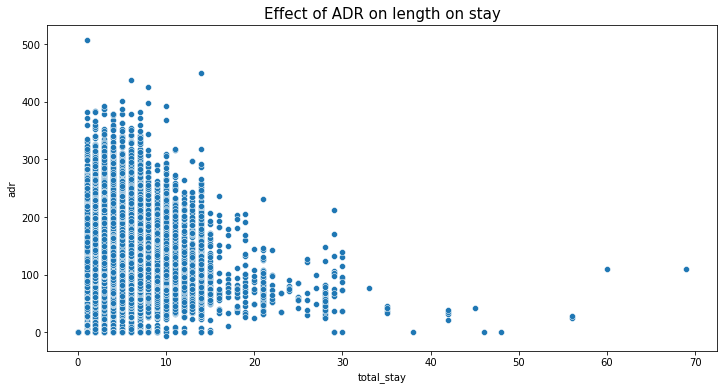

In [32]:
# to remove the outliers
df.drop(df[df['adr'] > 5000].index, inplace = True)

# ploting scatter plot
plt.figure(figsize = (12,6))

ax = sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
ax.set_title("Effect of ADR on length on stay", fontsize =15)

plt.show()



## Effect of lead time on booking cancellation

Text(0, 0.5, 'percent booking cancelled')

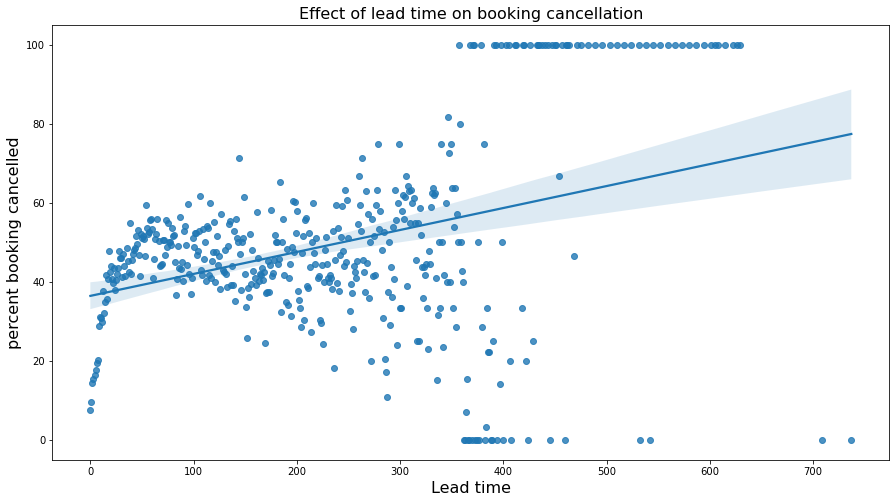

In [33]:
lead_time_df = df.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(15, 8))
ax = sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
ax.set_title("Effect of lead time on booking cancellation", fontsize=16)
ax.set_xlabel("Lead time", fontsize=16)
ax.set_ylabel("percent booking cancelled", fontsize=16)

Since, the points are dispersed indicating that there is least correlation between the lead time with booking cancellation.